In [ ]:
#This code helps know the top 20 items that sales in your supermarket. It can also be used as a model for other stores.
#It is available for anyone who wants to perform some analysis for their shop. 

In [8]:
import pandas as pd

In [14]:
#Here you will load in your excel sheets.

files = [
    "November 2024.xlsx",
    "October 2024.xlsx",
    "September 2024.xlsx",
    "December 2024.xlsx"
]

In [16]:
# In the usecols, specific the columns that you want to use to perform your analysis.
processed_dataframes = [
    pd.read_excel(file, header=1, usecols=['ItemName','Qty Sold']) for file in files
]

In [18]:
len(processed_dataframes)

4

In [20]:
for df in processed_dataframes:
    df['Qty Sold'] = pd.to_numeric(df['Qty Sold'], errors='coerce')

In [22]:
#checking for those items that has NaN values
nan_rows_in_first = processed_dataframes[2][processed_dataframes[2].isnull().any(axis=1)]
nan_rows_in_first.head(30)

,ItemName,Qty Sold
65,ItemName,NaN
134,ItemName,NaN
203,ItemName,NaN
272,ItemName,NaN
314,NaN,5365.0
315,NaN,5365.0


In [24]:
combined_df =pd.concat(processed_dataframes,ignore_index=True)
combined_df.head(10)

,ItemName,Qty Sold
0,obaapapa oil,9.0
1,yazz panty liner,2.0
2,Cold Relief,3.0
3,cadbury sachet,5.0
4,Kool-Aid,8.0
5,Malt n Milk,50.0
6,madar antiseptic,4.0
7,Paracetamol UK,4.0
8,ideal fruity toffee,58.0
9,Matches,13.0


In [26]:
#Dropping roles that has NaN at the Qty Sold column
combined_df = combined_df.dropna(subset=['Qty Sold'])

In [28]:
top_selling_items = (combined_df.groupby('ItemName', as_index=False)['Qty Sold'].sum().sort_values(by='Qty Sold', ascending=False).head(20))
top_selling_items

,ItemName,Qty Sold
415,verna water s/s,2188.0
359,oat choco,816.0
193,Plastic cup s/s,745.0
135,Kalyppo,722.0
305,dewberry biscuit,676.0
100,FanIce,578.0
89,Egg,562.0
192,Plastic cup b/s,540.0
295,coloured plastic cup,539.0
404,tomtom,503.0


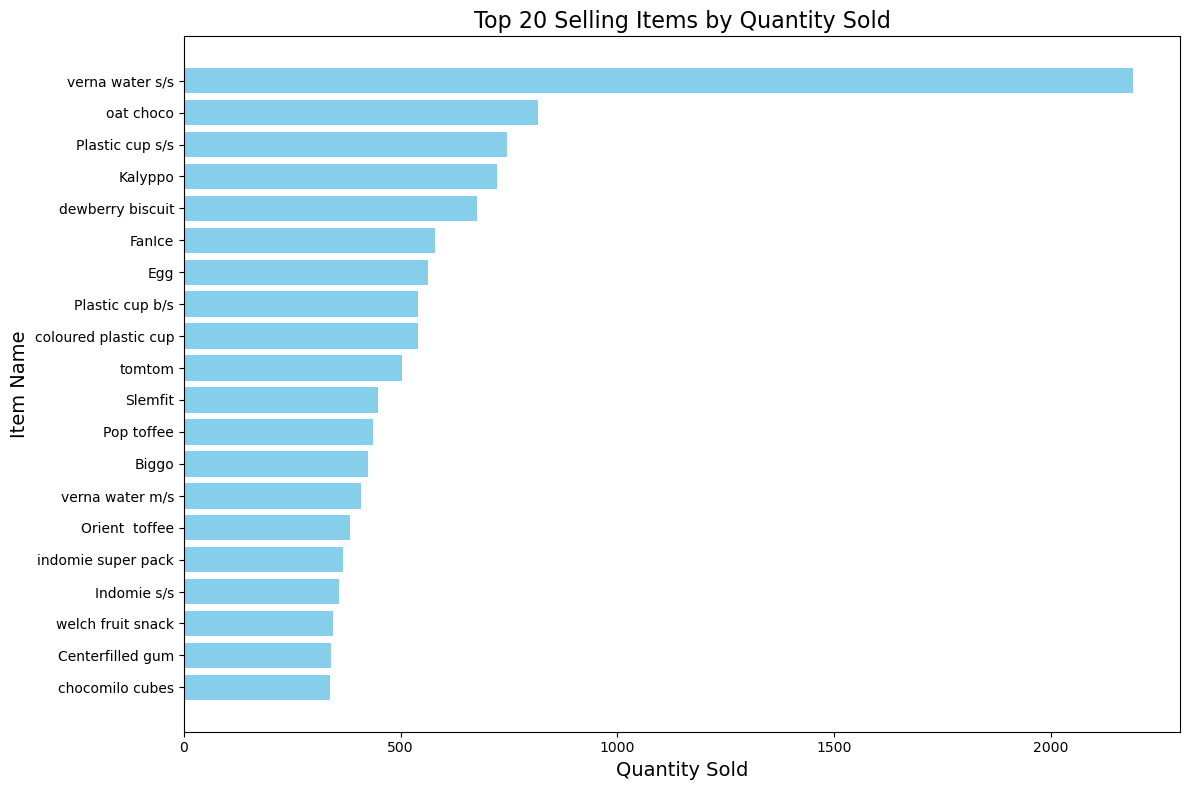

In [30]:
import matplotlib.pyplot as plt

# Plot for top selling items
plt.figure(figsize=(12, 8))
plt.barh(top_selling_items["ItemName"], top_selling_items["Qty Sold"], color='skyblue')
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Item Name', fontsize=14)
plt.title('Top 20 Selling Items by Quantity Sold', fontsize=16)
plt.gca().invert_yaxis()  # Inverting the plot
plt.tight_layout()
plt.show()